In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense


In [24]:
df=pd.read_csv(r"C:\Users\hp\Downloads\Churn_Modelling.csv")
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
# 1. Convert categorical columns to numbers using One-Hot Encoding
# drop_first=True helps avoid the "dummy variable trap"
X = pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)

# 2. Now perform the split again with the numeric-only data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 3. Now you can scale the data without errors
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [36]:
model = keras.models.Sequential()
# The input_dim must match the number of columns in X_train_trf
model.add(keras.layers.Dense(300, activation="relu", input_dim=X_train_trf.shape[1]))
model.add(keras.layers.Dense(100, activation="relu"))
# Use 1 neuron and 'sigmoid' because Churn is a Binary Classification (Yes/No)
model.add(keras.layers.Dense(1, activation="sigmoid"))

C:\Users\hp\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 300)            │         3,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,801 (132.04 KB)

 Trainable params: 33,801 (132.04 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 1. Compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

# 2. Fit the model immediately after
history = model.fit(X_train_trf, y_train, 
                    batch_size=50, 
                    epochs=100, 
                    verbose=1, 
                    validation_split=0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.8136 - loss: 0.4306 - val_accuracy: 0.8344 - val_loss: 0.3888
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8533 - loss: 0.3609 - val_accuracy: 0.8481 - val_loss: 0.3682
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8572 - loss: 0.3449 - val_accuracy: 0.8525 - val_loss: 0.3626
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8603 - loss: 0.3403 - val_accuracy: 0.8562 - val_loss: 0.3563
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8639 - loss: 0.3335 - val_accuracy: 0.8531 - val_loss: 0.3570
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8612 - loss: 0.3307 - val_accuracy: 0.8600 - val_loss: 0.3534
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8628 - loss: 0.3285 - val_accuracy: 0.8537 - val_loss: 0.3534
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8639 - loss: 0.3233 - val_ac

In [39]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


In [40]:
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], shape=(2000, 1), dtype=float32)

In [41]:
y_pred = y_pred.argmax(axis=-1)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

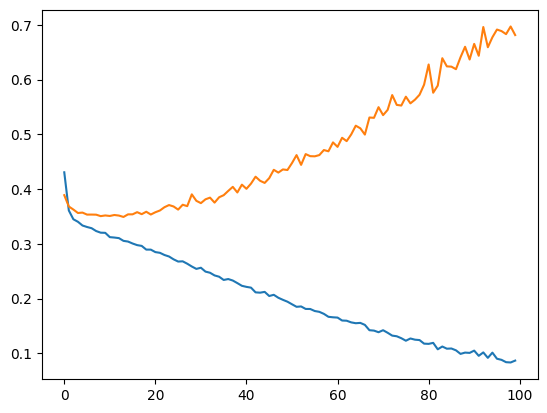

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

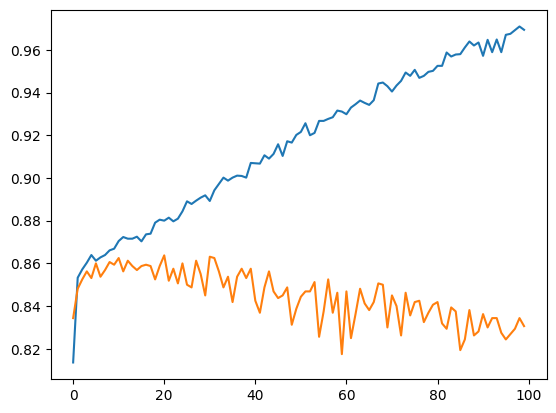

In [44]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])